In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

import sys
sys.path.append("../")
import nn_permuter

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
batch_size = 1000000
window_size = 3
random_windows = torch.randint(0, 256, (batch_size, window_size, window_size), dtype=torch.uint8).to(device)
random_physics = nn_permuter.FlatNNMatrixPermuter(nn_permuter.wide_n_deep(window_size**2, window_size**2, 5, 1000)).to(device)

In [5]:
with torch.no_grad():
    updates = random_physics(random_windows)
    n_same = torch.sum(torch.eq(random_windows, updates), dim=(-1, -2))/(window_size**2)

OutOfMemoryError: CUDA out of memory. Tried to allocate 3.73 GiB (GPU 0; 11.76 GiB total capacity; 3.78 GiB already allocated; 2.44 GiB free; 7.51 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [14]:
def make_cdf(x):
    return sorted(x), np.arange(len(x)) / len(x)

In [15]:

cdf_x, cdf_n = make_cdf(n_same.cpu().numpy())

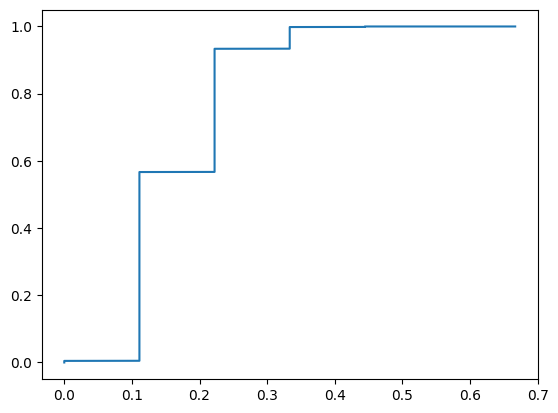

In [16]:
fig, axs = plt.subplots()
axs.plot(cdf_x, cdf_n)
